## Portada


### Clustering: Clasificacion no supervisada, aprendizaje 

## Metodo Clustering Jerarquico
### Suele representarse a traves de un dendograma, que muestra en que orden se han unido los cluster y cual es el grado de proximidad que tienen los clusters que se unen


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Import the dendogram function and the word, single , complete, average
from scipy.cluster.hierarchy import dendrogram, ward , single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist


In [8]:
## Funcion para calcular los centroides de cada closter
def centroide(num_cluster,data,cluster):
    ind=cluster==num_cluster
    return (pd.DataFrame(data[ind].mean()).T)

In [9]:
## Funcion para graficar los graficos de barra para la interpretacion de los clusters
def bar_plot(centros, labels, cluster=None,var=None):
    from math import ceil, floor
    from seaborn import color_palette
    colors=color_palette()
    minimo=floor(centros.min().min()) if floor(centros.min().min())<0 else 0
    def inside_plot(valores,labels,titulo):
        plt.barh(range(len(valores)), valores,1/1.5, color=colors)
        plt.xlim(minimo, ceil(centros.max().max()))
        plt.title(titulo)
    if var is not None:
        centros=np.array([n[[x in var for x in labels]] for n in centros])
        colores=[colores[x % len(colores)]for x, i in enumerate(labels) if i in var]
        labels=labels[[x in var for x in labels]]
    if cluster is None:
        for i in range(centros.shape[0]):
            plt.subplot(1,centros.shape[0],i+1)
            inside_plot(centros[i].tolist(),labels,"Cluster "+str(i+1))
            plt.yticks(range(len(labels)), labels) if i==0 else plt.yticks([])
    else:
        pos = 1
        for i in cluster:
            plt.subplot(1,len(cluster),pos)
            inside_plot(centros[i].tolist(),labels,"Cluster "+str(i+1))
            plt.yticks(range(len(labels)), labels) if pos==1 else plt.yticks([])
            pos += 1

In [10]:
## Ejemplos datos estudiantes
import os
import pandas as pd

os.chdir("C:/Users/josee/OneDrive/Escritorio/ICI/Sexto Semestre/Aprendizje Inteligente")

datos=pd.read_csv("EjemploEstudiantes.csv", delimiter=";", decimal=",", index_col=0)
print(datos)

        Matematicas  Ciencias  Espanol  Historia  EdFisica
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andres          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
Jose            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
Maria           6.8       7.2      8.7       9.0       7.0


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [20.0, 20.0, 65.0, 65.0]],
 'dcoord': [[0.0, 0.5567764362830023, 0.5567764362830023, 0.0],
  [0.0, 1.3379088160259653, 1.3379088160259653, 0.0],
  [0.5567764362830023,
   1.7117242768623688,
   1.7117242768623688,
   1.3379088160259653],
  [0.0, 1.8947295321496418, 1.8947295321496418, 0.0],
  [0.0, 0.6557438524301998, 0.6557438524301998, 0.0],
  [0.0, 1.392838827718412, 1.392838827718412, 0.0],
  [0.6557438524301998,
   1.9862024066041202,
   1.9862024066041202,
   1.392838827718412],
  [1.8947295321496418,
   6.130388785930844,
   6.130388785930844,
   1.9862024066041202],
  [1.7117242768623688,
   7.868375520609914,
   7.868375520609914,
   6.130388785930844]],
 'ivl': ['Ana',
  'Jose',
  'Pedro',
  'Ines',
  'Luis',
  'Sonia',
  'Andres',
  'Carlos',
  

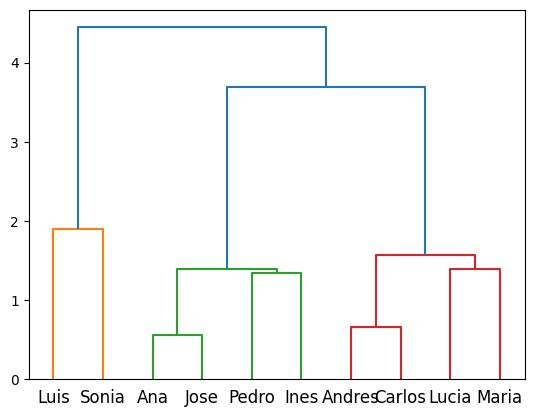

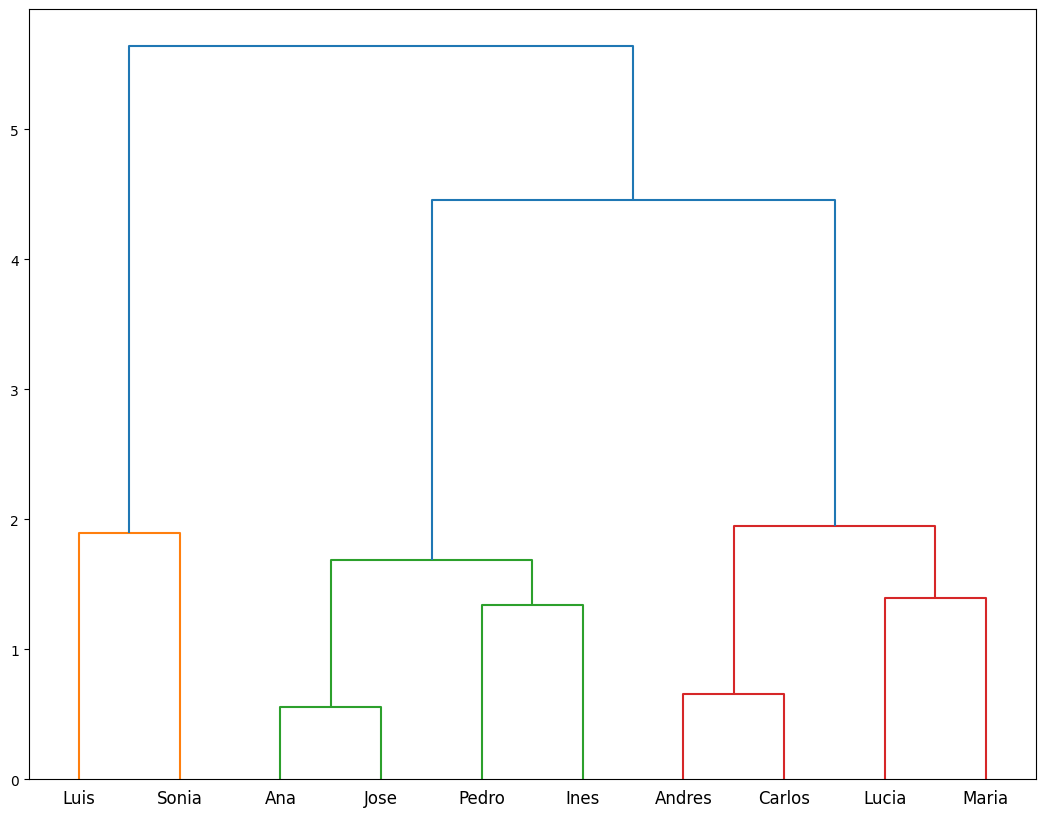

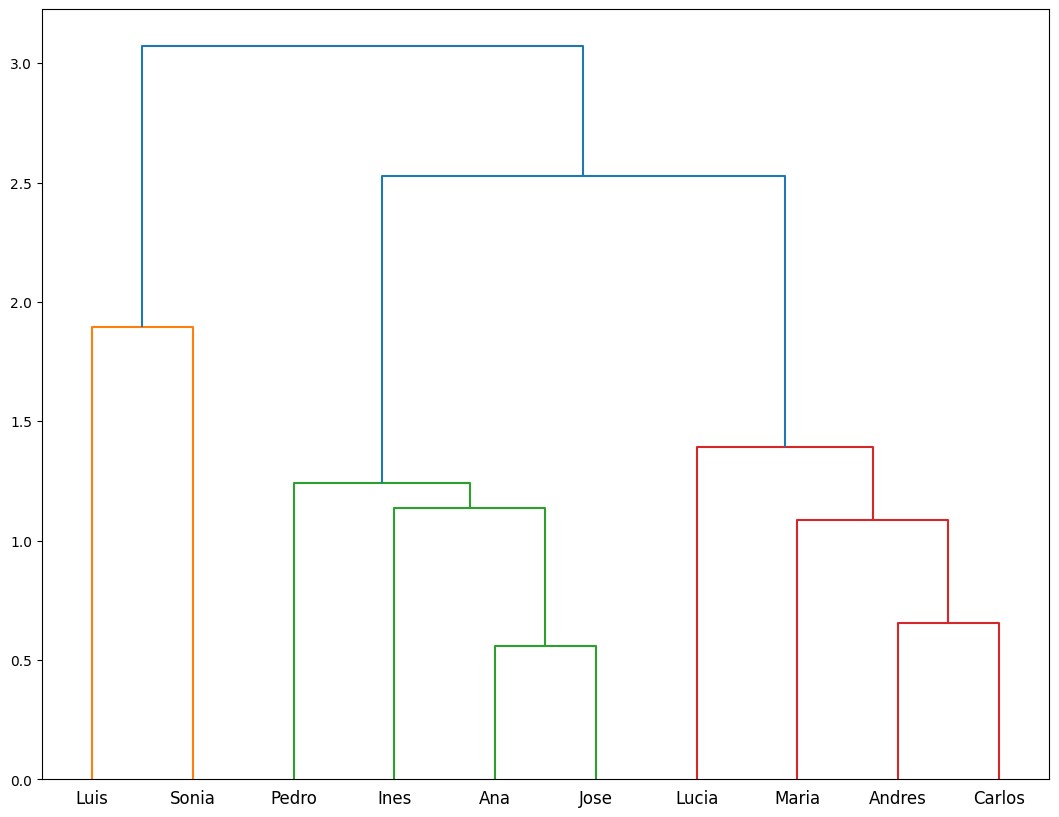

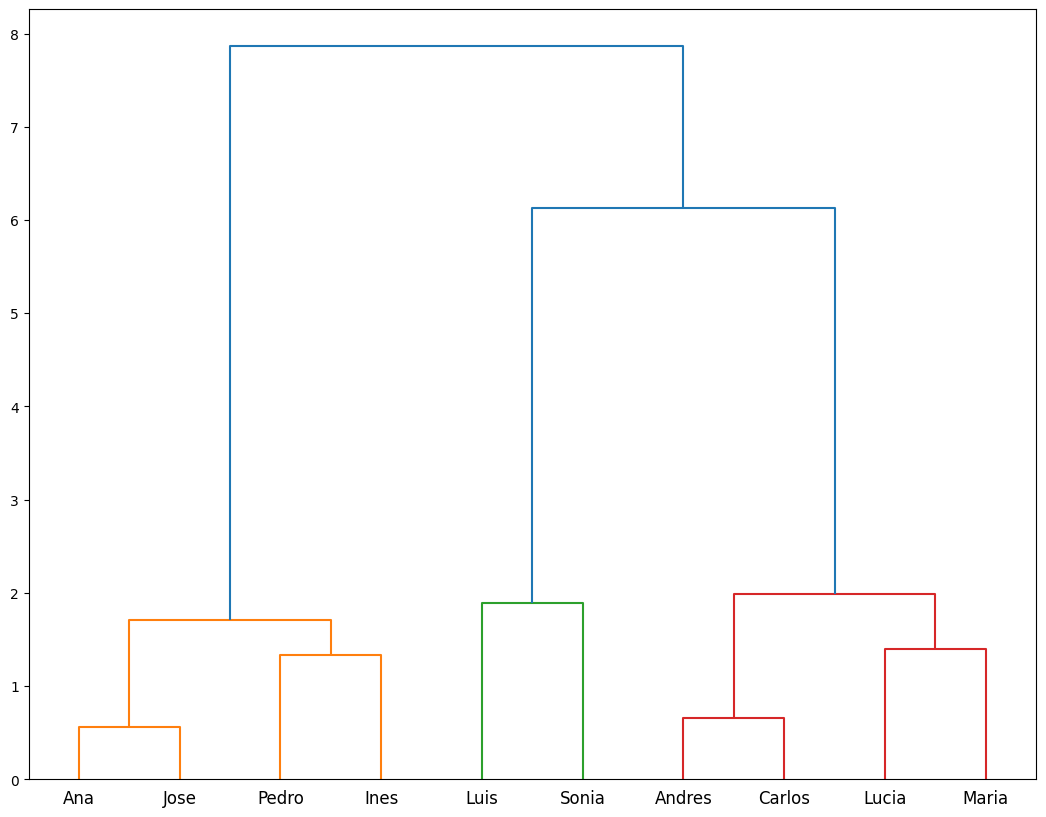

In [11]:
## Ejemplos con varias funciones de agregacion, declaracion de instancias de clases

ward_res=ward(datos) #ward
single_res=single(datos) #salto minimo
complete_res=complete(datos) #salto maximo
average_res=average(datos) #promedio

dendrogram(average_res, labels=datos.index.to_list())
plt.figure(figsize=(13,10))
dendrogram(complete_res, labels=datos.index.to_list())
plt.figure(figsize=(13,10))
dendrogram(single_res, labels=datos.index.to_list())
plt.figure(figsize=(13,10))
dendrogram(ward_res, labels=datos.index.to_list())


[2 0 0 1 2 0 2 0 1 2]
[[7.7   9.475 7.625 7.75  6.75 ]
 [5.5   6.25  6.5   6.25  8.85 ]
 [6.525 6.525 8.475 8.875 7.375]]


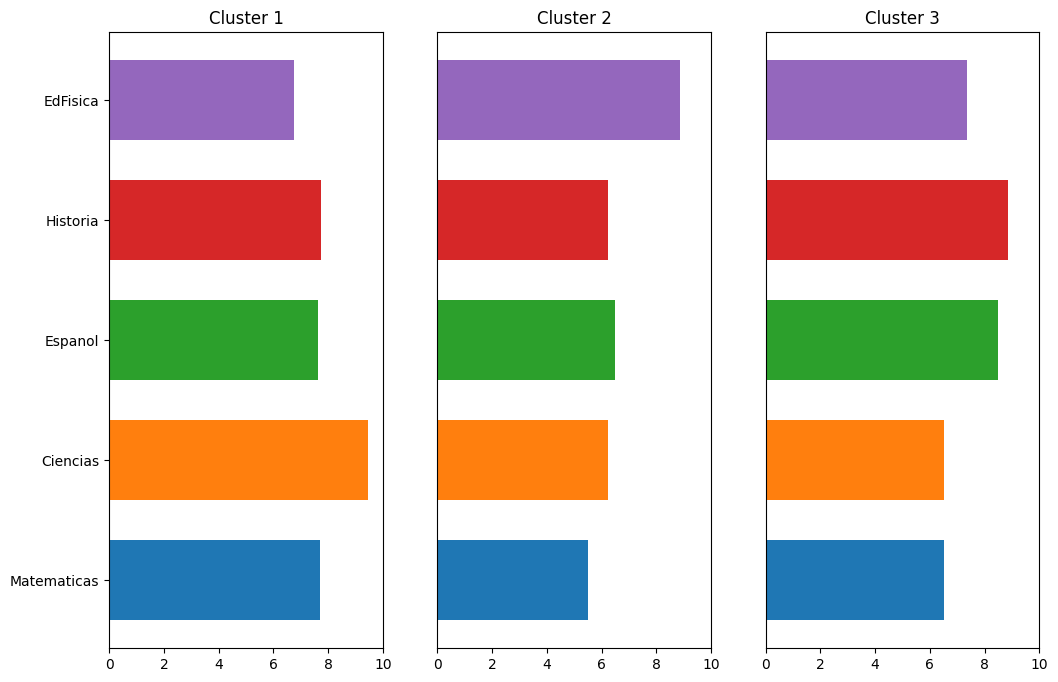

In [12]:
## Intepretacion de los clusters

grupos=fcluster(linkage(pdist(datos), method='ward', metric='euclidean'), 3, criterion='maxclust')
grupos=grupos-1 # se resta 1 para que los clusters se enumeren de 0 a (k-1)
#El siguiente print es para ver en que cluster quedo cada individuo
print(grupos)
centros=np.array(pd.concat([centroide(0,datos,grupos),
                            centroide(1,datos,grupos),
                            centroide(2,datos,grupos)]))
print(centros)
plt.figure(1,figsize=(12,8))
bar_plot(centros, datos.columns)